In [12]:
# This example is John Gutag's book
# the code is used to create clusters
# first we generate two cluster with mean and sigma
# second we apply k means cluster
# for simplicity we only use two clusters but the idea can be generalized
# the original code is written in class and object-oriented
# here we use more procedure type programming

import random

x1_record=[]
x2_record=[]

x1=0.0
x2=0.0
y1=0.0
y2=0.0
number_sample=5
#generate two clusters decorated with gaussian noise
for i in range(number_sample):
    x1=random.gauss(0,0.6) #create random number gauss (mean, sigma)
    x2=random.gauss(0,0.6)
    x1_record.append(float(x1))
    x2_record.append(float(x2))
for i in range(number_sample):
    y1=4.0+random.gauss(0,0.6)
    y2=3.0+random.gauss(0,0.6)
    x1_record.append(float(y1))
    x2_record.append(float(y2))

number = len(x1_record)
print(number)
#choose two cluster center or reference vector from one of the sample
cluster1= random.choice(range(0,number))
cluster2= random.choice(range(0,number))

centroid1x= x1_record[cluster1]
centroid1y= x2_record[cluster1]
centroid2x= x1_record[cluster2]
centroid2y= x2_record[cluster2]
print('initial choice',round(centroid1x,3), round(centroid1y,3), round(centroid2x,3), round(centroid2y,3))

index=[]
for j in range(number):
    index.append('0') # create a zero index tthis index record which cluster
                        #the data point is associated with

#run over all the sample and compute and compare the distance
for j in range(number):
    distance_to_cluster1= (centroid1x-x1_record[j])**2+(centroid1y-x2_record[j])**2
    distance_to_cluster2= (centroid2x-x1_record[j])**2+(centroid2y-x2_record[j])**2
    if distance_to_cluster1>distance_to_cluster2:
        index[j]=2
    else:
        index[j]=1

centroid_1_x=0.0  # index rule index for cluster
centroid_1_y=0.0
centroid_2_x=0.0
centroid_2_y=0.0
for iteration in range(10):
    sum_1_x=0.0
    sum_1_y=0.0
    sum_2_x=0.0
    sum_2_y=0.0
    count_1=0
    count_2=0
    for j in range(number):
        if index[j]==1:
            sum_1_x=sum_1_x+x1_record[j]
            sum_1_y=sum_1_y+x2_record[j]
            count_1=count_1+1
        elif index[j]==2:
            sum_2_x=sum_2_x+x1_record[j]
            sum_2_y=sum_2_y+x2_record[j]
            count_2=count_2+1
        else:
            print('error index') #for trouble shooting
    centroid_1_x=sum_1_x/count_1
    centroid_1_y=sum_1_y/count_1
    centroid_2_x=sum_2_x/count_2
    centroid_2_y=sum_2_y/count_2
    print('step', iteration, '1 x',round(centroid_1_x,3), '1 y',round(centroid_1_y,3),'2 x',round(centroid_2_x,3),'2 y',round(centroid_2_y,3))

    for j in range(number):
        distance_to_cluster1= (centroid_1_x-x1_record[j])**2+(centroid_1_y-x2_record[j])**2
        distance_to_cluster2= (centroid_2_x-x1_record[j])**2+(centroid_2_y-x2_record[j])**2
        if distance_to_cluster1>distance_to_cluster2:
            index[j]=2
        else:
            index[j]=1

for j in range(number):
    print( 'sample #', j, 'hard label', index[j], round(x1_record[j],3),round(x2_record[j],3))

10
initial choice -0.052 0.054 3.99 2.708
step 0 1 x 0.036 1 y 0.024 2 x 3.926 2 y 3.039
step 1 1 x 0.036 1 y 0.024 2 x 3.926 2 y 3.039
step 2 1 x 0.036 1 y 0.024 2 x 3.926 2 y 3.039
step 3 1 x 0.036 1 y 0.024 2 x 3.926 2 y 3.039
step 4 1 x 0.036 1 y 0.024 2 x 3.926 2 y 3.039
step 5 1 x 0.036 1 y 0.024 2 x 3.926 2 y 3.039
step 6 1 x 0.036 1 y 0.024 2 x 3.926 2 y 3.039
step 7 1 x 0.036 1 y 0.024 2 x 3.926 2 y 3.039
step 8 1 x 0.036 1 y 0.024 2 x 3.926 2 y 3.039
step 9 1 x 0.036 1 y 0.024 2 x 3.926 2 y 3.039
sample # 0 hard label 1 0.404 0.303
sample # 1 hard label 1 -0.478 0.155
sample # 2 hard label 1 -0.461 -0.196
sample # 3 hard label 1 -0.052 0.054
sample # 4 hard label 1 0.766 -0.196
sample # 5 hard label 2 4.156 3.236
sample # 6 hard label 2 3.561 3.56
sample # 7 hard label 2 3.853 2.566
sample # 8 hard label 2 4.067 3.126
sample # 9 hard label 2 3.99 2.708


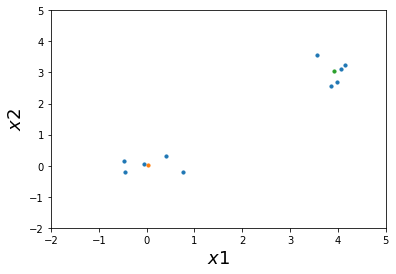

In [13]:
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.scatter(x1_record, x2_record, s=10)
plt.scatter(centroid_1_x, centroid_1_y, s=10)
plt.scatter(centroid_2_x, centroid_2_y, s=10)

plt.xlabel("$x1$", fontsize=18)
plt.ylabel("$x2$", rotation=90, fontsize=18)
plt.axis([-2, 5, -2, 5])
plt.show()